<a href="https://colab.research.google.com/github/2303A510A3/AIML-LAB/blob/main/lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [33]:
df = pd.read_csv("/content/sample_data/california_housing_train.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [35]:
# Generate summary for min, max, stddev, quartiles
summary = data.describe(percentiles=[.25, .5, .75, .9])
print(summary)


          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
90%     -117.240000     38.480000           46.000000   4677.100000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.00

In [42]:
# List column names
print(data.columns.tolist())

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'Price', 'median_house_value']


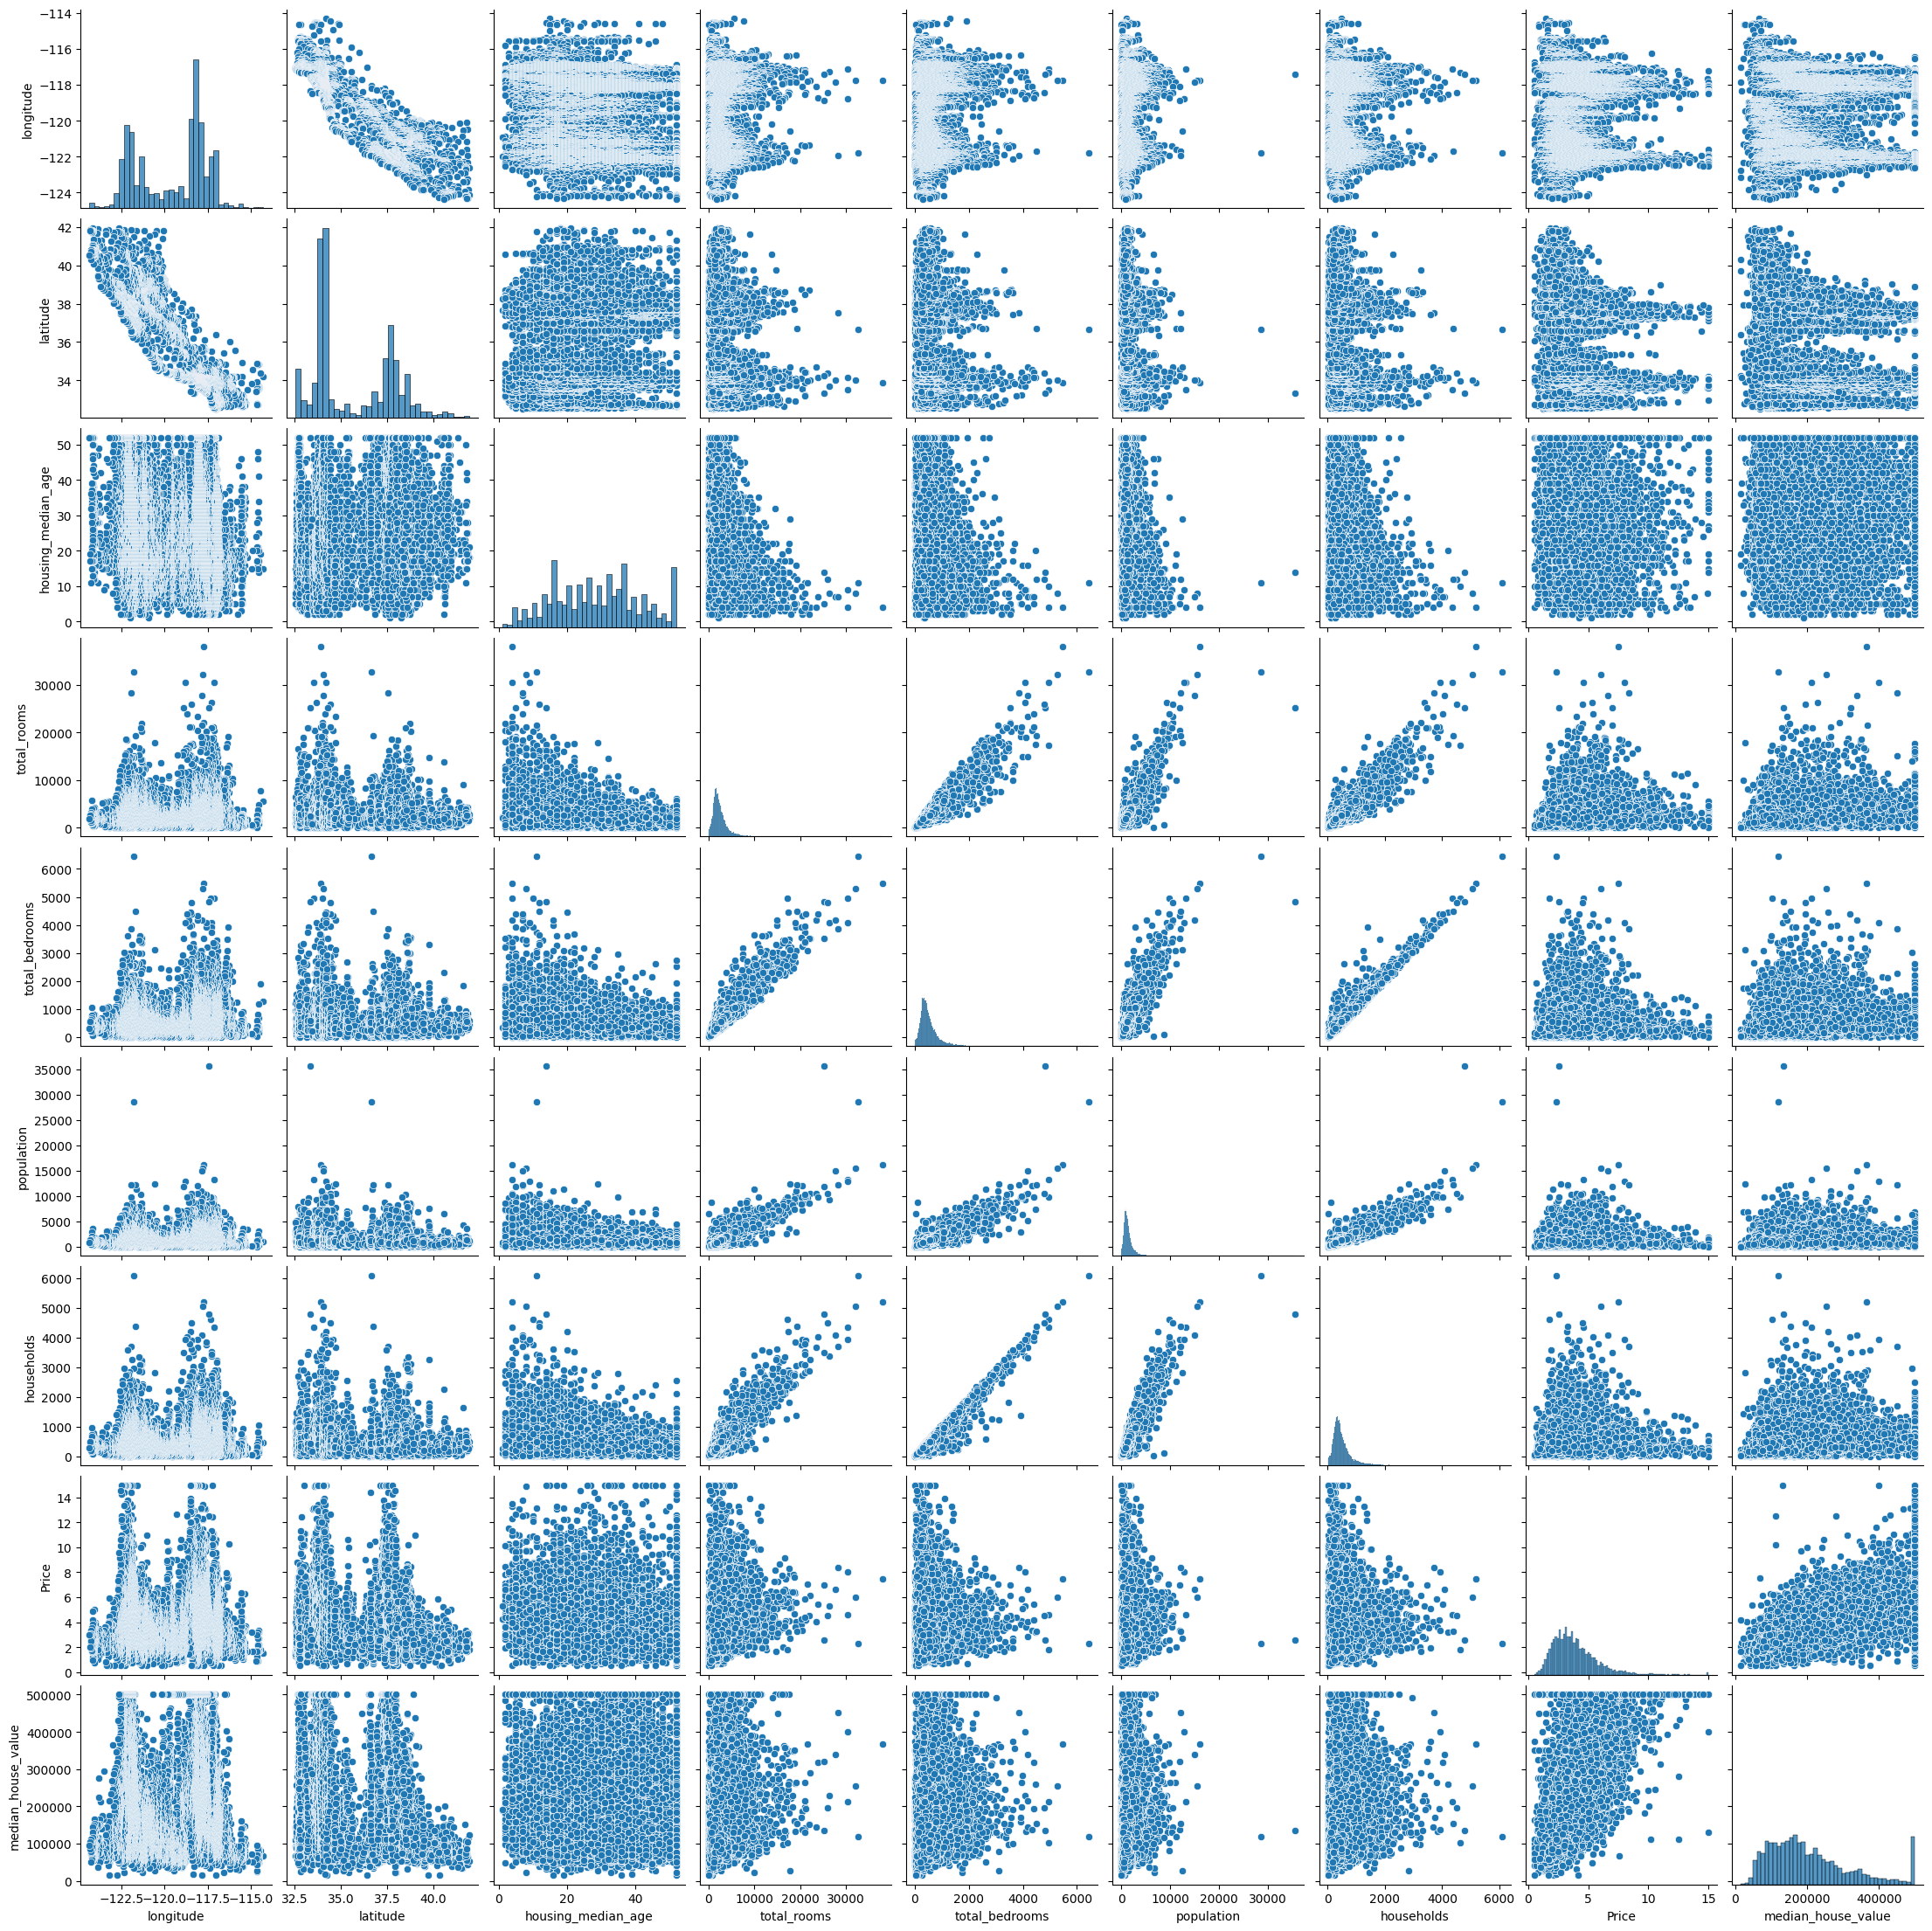

In [43]:
# Pairplot of the dataset
sns.pairplot(data)
plt.show()

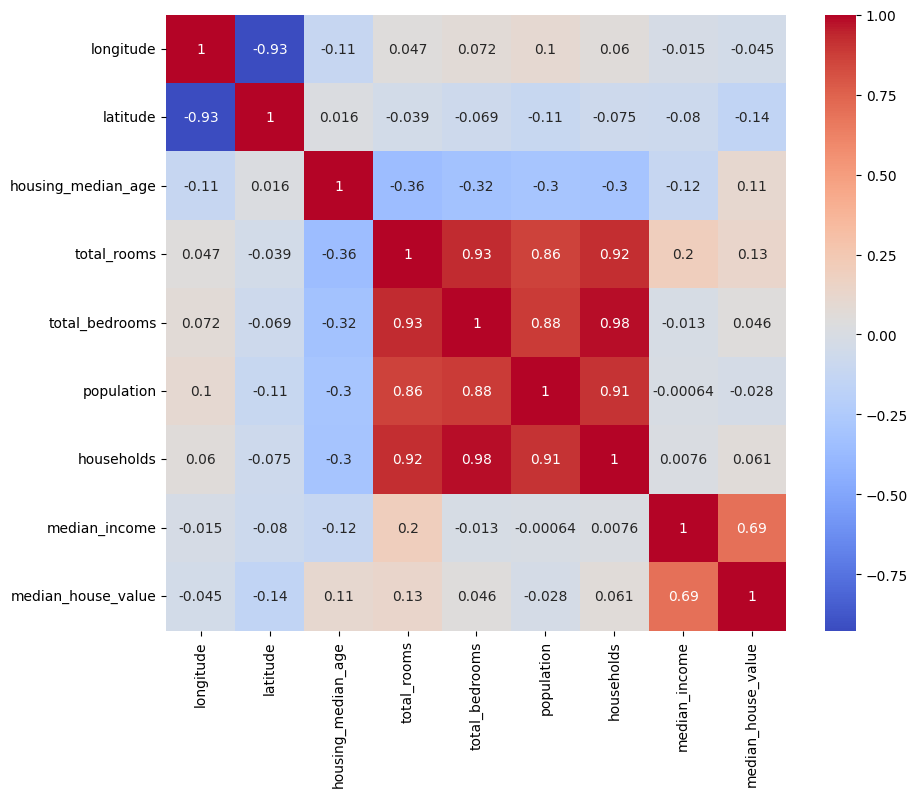

In [38]:
# Generate correlation matrix
correlation_matrix = data.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [53]:

dependent_variable = 'Price'

independent_variables = data.select_dtypes(include=[np.number]).columns.tolist()
independent_variables.remove(dependent_variable)

print("Dependent Variable:", dependent_variable)
print("Independent Variables:", independent_variables)


Dependent Variable: Price
Independent Variables: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_house_value', 'Normalized_Price']


part 2

In [55]:
from sklearn.model_selection import train_test_split
X = data[independent_variables]
Y = data[dependent_variable]

# Step 2: Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (13600, 9)
X_test shape: (3400, 9)
y_train shape: (13600,)
y_test shape: (3400,)


In [57]:


linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)
print("Intercept:", linear_regressor.intercept_)
print("Coefficients:", linear_regressor.coef_)


Intercept: 0.49990000000123924
Coefficients: [ 1.49622502e-14  1.45241578e-14  1.49944075e-16 -7.29043905e-19
 -2.22773900e-17  2.87031673e-18  2.46800718e-17  1.48230766e-19
  1.45002000e+01]


In [58]:
#  Fit the model to the training data
linear_regressor.fit(X_train, y_train)

#  Print the intercept and coefficients
print("Intercept:", linear_regressor.intercept_)
print("Coefficients:", linear_regressor.coef_)


Intercept: 0.49990000000123924
Coefficients: [ 1.49622502e-14  1.45241578e-14  1.49944075e-16 -7.29043905e-19
 -2.22773900e-17  2.87031673e-18  2.46800718e-17  1.48230766e-19
  1.45002000e+01]


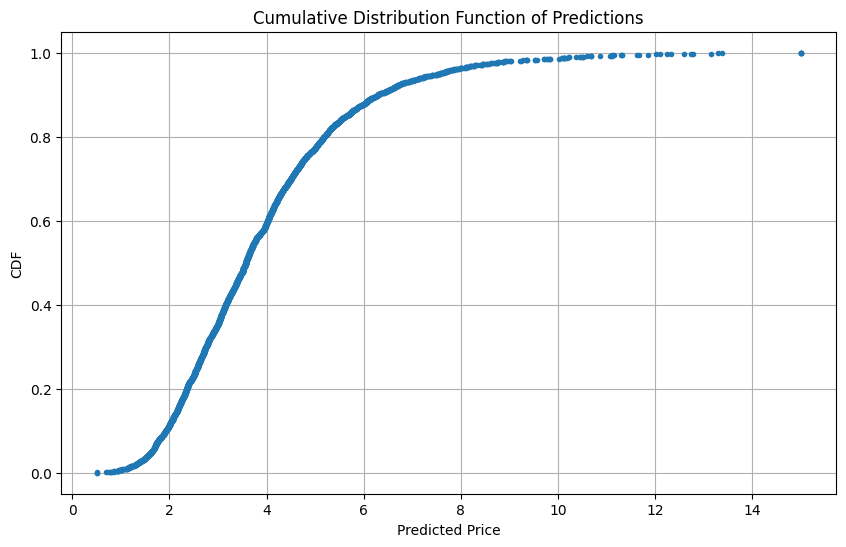

In [60]:
# Step 3: Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_predictions, cdf, marker='.', linestyle='none')
plt.title('Cumulative Distribution Function of Predictions')
plt.xlabel('Predicted Price')
plt.ylabel('CDF')
plt.grid()
plt.show()


part 3

In [48]:
# Standard error, t-statistics calculations (requires custom approach, often scipy stats)
from scipy.stats import t

# Predicted values and residuals
y_pred_train = linear_regressor.predict(X_train)
residuals = y_train - y_pred_train
sse = np.sum(residuals ** 2)
se = np.sqrt(sse / (len(y_train) - len(X_train.columns) - 1))
t_stat = coefficients / se

print("Standard Error:", se)
print("t-Statistics:", t_stat)


Standard Error: 1.113404159192582
t-Statistics: [ 3.22054294e-02  1.22999410e-02 -1.88544665e-02  8.30677300e-04
 -4.65838071e-03  3.32637596e-06  3.49122593e-04  9.17278699e-06]


In [49]:
# Calculate R2 score
r2_score = metrics.r2_score(y_test, linear_regressor.predict(X_test))
print("R2 Score:", r2_score)

R2 Score: 0.6784504439733754


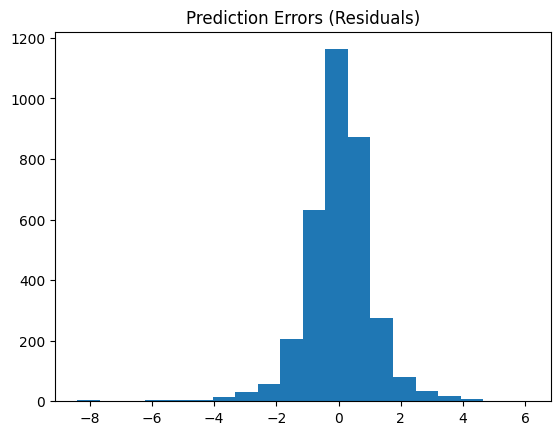

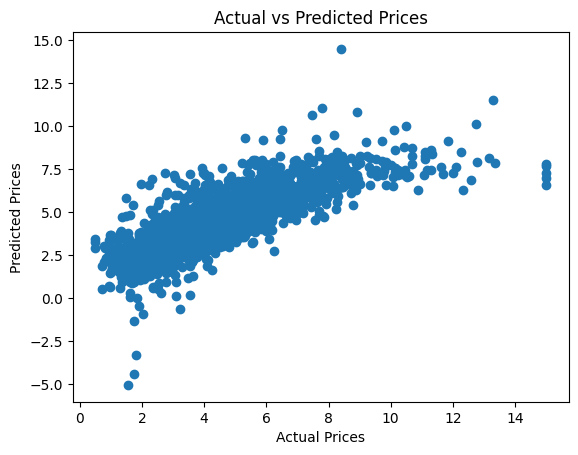

In [50]:
# Histogram of predictions
plt.hist(linear_regressor.predict(X_test) - y_test, bins=20)
plt.title("Prediction Errors (Residuals)")
plt.show()

# Scatterplot
plt.scatter(y_test, linear_regressor.predict(X_test))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [51]:
# Mean Absolute Error (MAE), Sum of Squared Errors (SSE), Root Mean Squared Error (RMSE)
mae = metrics.mean_absolute_error(y_test, linear_regressor.predict(X_test))
sse = np.sum((linear_regressor.predict(X_test) - y_test) ** 2)
rmse = np.sqrt(metrics.mean_squared_error(y_test, linear_regressor.predict(X_test)))
r2 = metrics.r2_score(y_test, linear_regressor.predict(X_test))

print(f"MAE: {mae}")
print(f"SSE: {sse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MAE: 0.7544258892027191
SSE: 3954.5161386014793
RMSE: 1.0784678863747459
R2: 0.6784504439733754


part 4

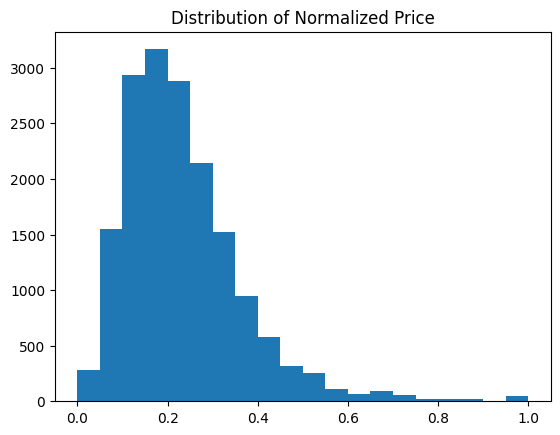

In [52]:
# MinMax Normalization
def minmax_normalize(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

# Apply MinMax normalization to a selected feature
normalized_price = minmax_normalize(data['Price'])
data['Normalized_Price'] = normalized_price

# Plot the distribution of normalized price
plt.hist(normalized_price, bins=20)
plt.title("Distribution of Normalized Price")
plt.show()